#### Zadanie 1: Analiza wpływu struktury gramatycznej na toksyczność komentarzy
Przeprowadź analizę zależności składniowych (dependency parsing). Porównaj złożoność struktury gramatycznej w komentarzach o wysokiej i niskiej toksyczności. Przedstaw wyniki na wykresie pudełkowym, aby zobaczyć różnice w złożoności składniowej.

#### Zadanie 2: Identyfikacja kluczowych czynników toksyczności na podstawie NER i zależności składniowych
Przeanalizuj najbardziej toksyczne komentarze pod kątem nazwanych jednostek (NER) oraz zależności składniowych (dependency parsing). Zidentyfikuj, jakie nazwane jednostki są najczęściej w toksycznych komentarzach i w jaki sposób struktura zależności przyczynia się do toksyczności. Przedstaw wyniki w postaci drzew zależności i statystyk.


#### Zadanie 3: Analiza stylu narracyjnego na podstawie zależności składniowych
Przeprowadź analizę zależności składniowych dla zdań z obu książek. Porównaj złożoność składniową obu tekstów (np. liczba podmiotów, dopełnień, orzeczeń w jednym zdaniu) i przedstaw wyniki na wykresach oraz wizualizacjach drzew składniowych.

#### Zadanie 4: Analiza tematyczna na podstawie NER i lematyzacji – porównanie podejścia do postaci i miejsc w obu książkach
Wykorzystaj NER i lematyzację, aby porównać, w jaki sposób "Anna Karenina" i "Jane Eyre" traktują postaci i miejsca. Zidentyfikuj najczęściej wspominane jednostki i zanalizuj ich kontekst. Wyniki przedstaw w formie chmur słów i raportu porównawczego.

In [55]:
#ZAD1

import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from collections import Counter

nlp = spacy.load('en_core_web_sm')
sia = SentimentIntensityAnalyzer()

In [56]:
data = pd.read_csv('sample.csv')

doc = data['comment_text'].apply(lambda text: nlp(text))

In [58]:
data['sentiment'] = data['comment_text'].apply(analyze_sentiment)

In [59]:
def analyze_toxicity(text):
    toxicity_score = sia.polarity_scores(text)
    if toxicity_score['compound'] >= 0.05:
        return 'positive'
    elif toxicity_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
data['toxicity'] = data['comment_text'].apply(analyze_toxicity)

sentimental_toxicity = data.groupby('sentiment')['target'].mean()

In [60]:
def calculate_complexity(text):
    doc = nlp(text)
    return len([token for token in doc if token.dep_ != 'punct'])

data['complexity'] = data['comment_text'].apply(calculate_complexity)

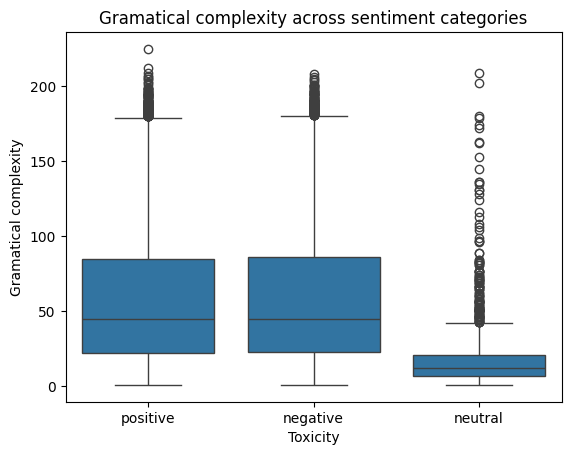

In [61]:
complexity_toxicity = data.groupby('complexity')['target'].mean()

sns.boxplot(x='sentiment', y='complexity', data=data)
plt.title('Gramatical complexity across sentiment categories')
plt.ylabel('Gramatical complexity')
plt.xlabel('Toxicity')
plt.show()

In [4]:
#ZAD2
#Załadowanie modelu
nlp = spacy.load('en_core_web_sm')

#Załadowanie danych
data = pd.read_csv('sample.csv')

#Tworzenie obiektów 'doc' za pomocą za pomocą wybranego modelu
data['doc'] = data['comment_text'].apply(lambda text: nlp(text))

In [5]:
#Funkcję do wyliczenia zależności i jednostek
def extract_dependencies(doc):
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]
    return dependencies

def extract_entities(doc):
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [6]:
#Zastosowanie wcześniej utworzonych funkcji
data['dependencies'] = data['doc'].apply(extract_dependencies)
data['entities'] = data['doc'].apply(extract_entities)

In [7]:
#Wizualizacja (w tym wypadku pierwszego komentarza)
def dependency_visualization_tree(text):
    doc = nlp(text)
    displacy.render(doc, style='dep', jupyter=True)

dependency_visualization_tree(data['comment_text'].iloc[0])

In [10]:
#Obliczanie złożoności zdań
data['dependency_count'] = data['doc'].apply(lambda doc: len([token for token in doc if token.dep_ != 'punct']))

#Częstotliwość zależności etykiet
def count_dependency_label(text):
    dep_labels = [token.dep_ for doc in text for token in doc]
    return Counter(dep_labels)

dependency_counts = count_dependency_label(data['doc'])

#Częstotliwość zależności jednostek
def count_entity_label(text):
    ext_labels = [ent.label_ for doc in text for ent in doc.ents]
    return Counter(ext_labels)

entity_counts = count_entity_label(data['doc'])

In [12]:
#Wyświetlanie wyników
print(dependency_counts)
print(entity_counts)
print(data['dependency_count'].mean())

Counter({'punct': 74126, 'nsubj': 51628, 'prep': 48907, 'det': 47148, 'pobj': 45934, 'ROOT': 35585, 'advmod': 31135, 'amod': 30602, 'dobj': 30008, 'aux': 28744, 'compound': 21394, 'conj': 18776, 'cc': 18095, 'dep': 17863, 'ccomp': 12216, 'poss': 10170, 'advcl': 9514, 'mark': 9075, 'attr': 8267, 'neg': 8166, 'xcomp': 7240, 'relcl': 6764, 'acomp': 6750, 'auxpass': 4508, 'nummod': 4043, 'pcomp': 3659, 'nsubjpass': 3633, 'npadvmod': 3500, 'acl': 3480, 'appos': 3176, 'prt': 2852, 'nmod': 2332, 'case': 2193, 'intj': 1500, 'expl': 1286, 'agent': 990, 'quantmod': 858, 'csubj': 818, 'dative': 669, 'predet': 647, 'oprd': 638, 'parataxis': 336, 'preconj': 276, 'meta': 116, 'csubjpass': 22})
Counter({'ORG': 6808, 'PERSON': 6520, 'GPE': 4663, 'DATE': 3079, 'NORP': 3028, 'CARDINAL': 2851, 'MONEY': 700, 'ORDINAL': 611, 'PERCENT': 521, 'LOC': 504, 'WORK_OF_ART': 313, 'TIME': 253, 'PRODUCT': 224, 'FAC': 223, 'LAW': 167, 'EVENT': 131, 'QUANTITY': 125, 'LANGUAGE': 57})
54.5513


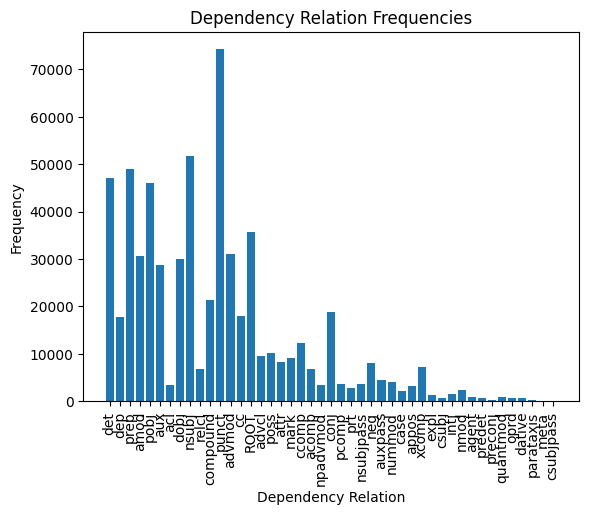

In [14]:
#Częstotliwość relacji zależności
plt.bar(dependency_counts.keys(), dependency_counts.values())
plt.title('Dependency Relation Frequencies')
plt.xlabel('Dependency Relation')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

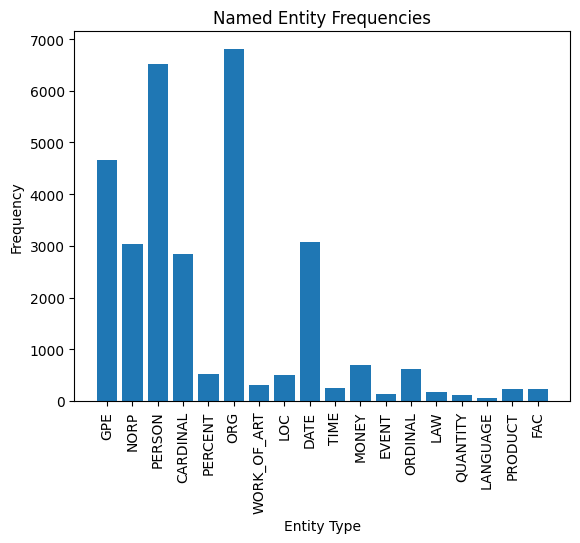

In [15]:
#Częstotliwość nazywanych obiektów
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Named Entity Frequencies')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [54]:
#ZAD3

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Step 1: Load the text from both books
with open('anna_karenina.txt', 'r', encoding='utf-8') as f:
    anna_text = f.readlines()

with open('jane_eyre.txt', 'r', encoding='utf-8') as f:
    jane_text = f.readlines()

anna_text_sentence = anna_text[:100]
jane_text_sentence = jane_text[:100]
#print(anna_text_sentence)
#print(jane_text_sentence)

def preprocess_text(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    return sentences

anna_sentences = preprocess_text(anna_text_sentence[0])
jane_sentences = preprocess_text(jane_text_sentence[0])

displacy.render(anna_sentences, style='dep', jupyter=True)
displacy.render(jane_sentences, style='dep', jupyter=True)

In [65]:
def extract_syntactic_info(sentences):
    syntactic_info = {
        'subjects': 0,
        'objects': 0,
        'predicates': 0,
        'others': 0,
        'total_dependencies': []
    }

    for sentence in sentences:
        num_dependencies = 0
        for token in sentence:
            if token.dep_ == 'nsubj':
                syntactic_info['subjects'] += 1
            elif token.dep_ == 'dobj':
                syntactic_info['objects'] += 1
            elif token.dep_ == 'ROOT':
                syntactic_info['predicates'] += 1
            else: syntactic_info['others'] += 1
            num_dependencies += 1

        syntactic_info['total_dependencies'].append(num_dependencies)

    return syntactic_info

In [66]:
analyze_anna = extract_syntactic_info(anna_sentences)
analyze_jane = extract_syntactic_info(jane_sentences)

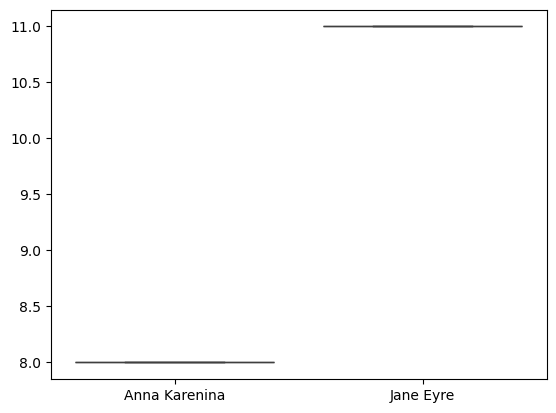

In [73]:
sns.boxplot(data = [analyze_anna['total_dependencies'], analyze_jane['total_dependencies']])
plt.xticks([0, 1], ['Anna Karenina', 'Jane Eyre'])
plt.show()

In [74]:
#Results

print("Anna results:")
print(f"Subjects:{analyze_anna['subjects']}")
print(f"Objects:{analyze_anna['objects']}")
print(f"Predicates:{analyze_anna['predicates']}")
print(f"Others:{analyze_anna['others']}")

print("-------------------------")

print("Jane results:")
print(f"Subjects:{analyze_jane['subjects']}")
print(f"Objects:{analyze_jane['objects']}")
print(f"Predicates:{analyze_jane['predicates']}")
print(f"Others:{analyze_jane['others']}")

Anna results:
Subjects:0
Objects:0
Predicates:1
Others:7
-------------------------
Jane results:
Subjects:0
Objects:0
Predicates:1
Others:10


In [ ]:
#ZAD4